<a href="https://colab.research.google.com/github/anishmahapatra/Zomato-Data-Visualization/blob/main/Visualization_%26_EDA_Zomato_Dataset_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization & EDA: Zomato Dataset

*Date: 10th March, 2020 <br/>
Author: AM* 

Welcome to this Collaboratory Notebook. We shall use this notebook to the Fundamentals of the Data Science process. Remember, the best way to learn Data Science is to simply <b>do it.</b> Crack your fingers, it's going to be a fun notebook. 

<b>Aim</b><br/> 
The purpose of this notebook is to analyze and visualize the [Zomato Dataset](https://www.kaggle.com/shrutimehta/zomato-restaurants-data).

The Zomato Dataset has been pulled from the Zomato API. The level of the Data is at a <b>Restaurant Id</b> Level.



<a name="0"></a>
## Table of Contents

1 [Data Understanding](#1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1 [Quick EDA](#1.1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1.1 [Pandas Profiling](#1.1.1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1.2 [Sweetviz](#1.1.2) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1.2 [Dataprep](#1.1.3) <br/>
2 [Visualization with Zomato Data](#2) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1 [What are the most common cuisines?](#2.1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2 [What are the top 15 restaurants with Maximum outlets](#2.2) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3 [How does Aggregate Rating get affected by other metrics?](#2.3) <br/>




<a name="1"></a>
## 1 Understanding the Dataset
Back to [Table of Contents](#0)

---

For this section, we shall install do the following:
- Install the required packages
- Import the required packages
- Read the Zomato data onto [Google Colab](https://research.google.com/colaboratory/faq.html) from a [GitHub Repository](https://www.youtube.com/watch?v=w3jLJU7DT5E)
- Read the Country Dataset onto Google Colab
- [Merge](#merge) the Zomato and Country Datasets


In [1]:
# Installing the required packages

! pip uninstall -y pandas-profiling &> /dev/null                # Package for pandas profiling - visualization
! pip install pandas-profiling[notebook,html] &> /dev/null      # Uninstalling and reinstalling it due to a bug in Google Colab
! pip install sweetviz &> /dev/null                             # Package for some sweet visualizations
! pip install -U dataprep &> /dev/null                          # Package for instant data preparation
! pip install --upgrade plotly &> /dev/null                     # Updating plotly to the latest version
! pip install jupyter-dash &> /dev/null                         # Installing jupyter-dash 

In [2]:
# Let us import the required packages

from dash.dependencies import Input, Output
from pandas_profiling import ProfileReport          # Pandas Profile to visualize the data
from dataprep.eda import plot_correlation           # Importing a package to visualize data correlation
from dataprep.eda import plot_missing               # Importing packge to plot the missing values of the dataset
from jupyter_dash import JupyterDash                # Importing Jupter Dash to use visualization components 

from IPython.display import display                 # Displaying widgets
import dash_html_components as html                 # To leverage html components in the visualization
import dash_core_components as dcc                  # Importing dash core components for visualization
import matplotlib.ticker as ticker                  # User-defined function for formatting graphs
import plotly.graph_objects as go                   # To use graph objects within visualizations

import matplotlib.pyplot as plt                     # Importing matplotlib for visualization
from dataprep.eda import plot                       # Importing package to plot/ visualize features of the dataset
import ipywidgets as widgets                        # Creating widgets
import plotly.express as px                         # Importing plotly express for visualizations
import matplotlib.cm as cm                          # Colormaps, colormaps handling utilities

import pandas_profiling                             # Automatic EDA
import sweetviz as sv                               # Importing sweetviz for some sweet visualizations
import seaborn as sns                               # Importing seaborn for visualization
import pandas as pd                                 # Importing pandas
import numpy as np                                  # Importing numpy
%matplotlib inline    
import warnings                                     # Importing package to toggle warnings
import IPython                                      # Importing ipython for displaying html files in the notebook

# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Hide Warnings
warnings.filterwarnings('ignore')



NumExpr defaulting to 2 threads.


In [3]:
# Reading the file onto Google Colab from GitHub using pandas library
zomatoDf = pd.read_csv("https://raw.githubusercontent.com/anishmahapatra/Zomato-Data-Visualization/main/data/zomato.csv", encoding = "ISO-8859-1")    # Reading file zomato.csv

In [4]:
# Viewing the shape of the data
zomatoDf.shape

(9551, 21)

In [5]:
# Viewing the top 5 rows of the dataset
zomatoDf.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591

From the above data, we can observe the following from the dataset:
- <b>Restaurant Data</b>: Restaurant Id, Restaurant Name, Has Table booking, Has Online delivery
- <b>Location Data</b>: Country Code, City, Address, Locality, Locality Verbose (Detailed description of the locality), Longitude, Latitude
- <b>Food Data</b>: Cuisines
- <b>Costing Data</b>: Average Cost for two, Currency, Price Range 
- <b>Order Details</b>: Is delivering, Switch to order menu
- <b>Restaurant Rating Details</b>: Aggregate Ratings, Rating color, Rating text, Votes


We shall now proceed to understand the data, summary statistics, data types and missing values better. 


In [6]:
# Reading country code 
countryDf = pd.read_csv("https://raw.githubusercontent.com/anishmahapatra/Zomato-Data-Visualization/main/data/Country-Code.csv")     

In [7]:
# Viewing the shape of the dataset
countryDf.shape

(15, 2)

In [8]:
# Viewing the top 5 results of the country Dataframe
countryDf.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

In [9]:
# Viewing the Zomato Dataset
zomatoDf.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591

<a name="merge"></a>
Merging the Zomato and Country Datasets

In [10]:
# Merging the zomato dataset at Restaurant Id level and Country data at country code level
zomatoCountryDf = pd.merge(zomatoDf, countryDf, on = 'Country Code')      # Pandas Merge function to join two dataframes

In [11]:
# Viewing the head of the 
zomatoCountryDf.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines

In [12]:
# Let's view a summary of the dataset now
print(zomatoCountryDf.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<a name="missing"></a>
 Missing value analysis

 Go to [dealing with missing values](#missingvalue)

In [13]:
# Printing all the columns with atleast one null value
zomatoCountryDf.columns[zomatoCountryDf.isna().any()].tolist()

['Cuisines']


From the above working, we can understand the following for the merged Zomato and Country Dataset have the following attributes:
- The dataset has 9551 rows and 22 columns
- There are 3 columns with float, 5 columns with int, 14 columns that are categorical
- There is one column 'Cuisines' that has missing values

<a name="1.1"></a>
## 1.1 Exploratory Data Analysis (EDA)

Now that we have some basic data understanding of the data we are dealing with, it's time to try and understand things a little more in details. We will proceed to <b>analyze and explore the data</b>. There is a common term in the Data Science community that we use to describe this: <u>Exploratory Data Analysis</u> (<b>[EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)</b>).</n>


Exploratory Data Analysis is used to get a <i>feel</i> of the data. We use it to understand the attributes, gaps and behaviour that the data has. A traditional way of doing it can be looking at the data column by column, row by row. As more developers contribute to the open-source python ecosystem, we have great packages that can help us analyze the data with minimal effort.







<a name="1.1.1"></a>
### 1.1.1 Pandas Profiling
Back to [Table of Contents](#0)

The [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling) package is used to generate profile report from a pandas dataframe. It gives column statistics on all of the columns in an interactive format that you can find below.

Since we have one primary dataset, let us make a copy of the dataset as *df* to be able to reuse the code later for any general dataset as well.

In [14]:
# Making a copy of the dataset as df
df = zomatoCountryDf.copy(deep = True)

In [15]:
# Generating the profile report and feeding it into a variable
# zomatoPandasProfile = ProfileReport(df, title = 'Zomato Data: Pandas Profiling Report', html = {'style':{'full_width':True}})

In [16]:
# Showcasing the Pandas Profiling Report for the Zomato Dataset
# zomatoPandasProfile

In one line of code using the <b>ProfileReport</b> function, we are able to get a brief and detailed glance on the entire dataset.

<a name="1.1.2"></a>
### 1.1.2 Sweetviz

Back to [Table of Contents](#0)

The [SweetViz](https://pypi.org/project/sweetviz/) package is a pandas-based library to visualize and compare datsets. <br/>
It is used for in-depth EDA to generate beautiful, high-density visualizations. 

In [17]:
# We shall use the SweetViz analyze() function to generate a shareable .html file to analyze the dataset
# analyze_report = sv.analyze(df)
# analyze_report.show_html('zomatoSweetViz.html', open_browser=False)

We now generate the SweetViz html file and generate the html file for it. We can see

In [18]:
# Displaying the html file in the Google Colab notebook
# IPython.display.HTML('zomatoSweetViz.html')

<a name="1.1.3"></a>
### 1.1.3 DataPrep
Back to [Table of Contents](#0)

[Dataprep](https://github.com/sfu-db/dataprep) is a python package to collect data, perform eda, clean and standardize data.

In [19]:
# Plotting the features of the dataframe
# plot(df)


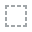
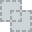
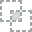
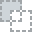
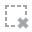
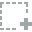
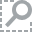
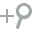
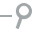
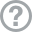
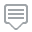
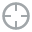
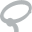
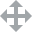
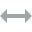
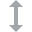
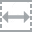
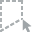
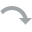
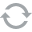
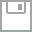
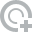
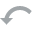
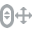
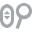
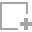
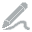
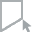
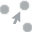
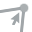
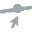

In [20]:
# Plotting the correlation of the dataframe
plot_correlation(df)


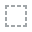
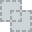
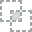
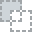
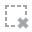
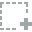
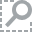
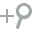
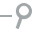
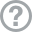
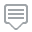
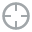
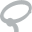
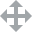
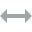
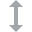
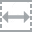
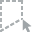
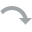
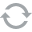
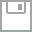
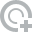
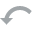
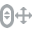
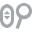
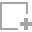
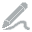
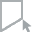
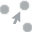
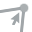
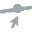

In [21]:
# Analyzing the miissing values from the dataset and visualizing it 
plot_missing(df)

From the above quick visualizations/EDa, we have now been able to understand and analyze the data. Following are some of the observations from the Zomato Dataset:

- We might need to redice the cardinality of <b>Cuisines</b> (High-Cardinality)
- We have 4 columns pertaining to the location, we can reduce the number of categories
- We will need to decide what to do with New Restaurants (where votes = 0 & <b>Aggregate Rating</b> = 0): Should we keep or remove them?
- We notice that about 80% of the data (<b>City</b>) is from New Delhi or nearby (Gurgaon & Noida) [57% New Delhi, 12% Gurgaon, 11% Noida] 
- 21% of <b>Cuisine</b> entries include North Indian, showcasing the affinity of the dataset suited towards North India
- We notice that we have different currencies of INR, Dollar, Pounds, AED and Others. Standardizing the currencies will give us more efective information to work with
- Both <b>Rating Text</b> and <b>Aggregate Rating</b> are communicating similar information, we can use either for our analysis

<a name="2"></a>
## 2 Visualizations
Back to [Table of Contents](#0)

---



One of the easiest ways to understand the data is to simply look at it. Depending on the complexity of the data, we can look at the table or we can try to visualize it. A visualization does not need to be complex or colorful. An effective visualization should convey the underlying information properly. 

We will begin with simple and effective visualizations and gradually make out way to more interesting ones.



We have a 2-D Canvas i.e., our computer screen when it comes to visualizing the data. The components that we can use to introduce dimensionality include the following:

1. X-Axis
2. Y-Axis
3. Color
4. Shape
5. Viz within viz

In [22]:
df = zomatoCountryDf.copy(deep=True)
df.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines

Showcasing the Data in a stylized manner

In [23]:
# Using Plotly to showcase relevant columns in a better format
fig = go.Figure(data=[go.Table(
    header=dict(values=['Restaurant Name', 'City', 'Cuisines', 'Country', 'Average Cost for two', 'Aggregate rating'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df['Restaurant Name'], df.City, df.Cuisines, df.Country, df['Average Cost for two'], df['Aggregate rating']],
               fill_color='lavender',
               align='left'))
])

# fig.show()

<a name="missingvalue"></a>

Some of the visualization displayed below do not wok when there are missing values. If we remember from our [missing value analysis](#missing), we have one column, 'Cuisines' with missing values.

There are multiple ways to deal with missing values. A few of the methods that we can use to populate the missing values are as follows:

1. Fill up the missing values with the most commonly occuring value in the column (mode)
2. Fill in values based on what would make more sense per the domain of the data in consideration (Verify with Subject Matter Expert)
3. Remove the rows if the percentage of missing values is negligible to your analysis

More Ways to deal with Missing Values In Machine Learning Datasets can be found [here](https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/).

For this case, we will be populatin gthe missing values with the Mode (the most commonly occuring cuisine)



In [24]:
# Viewing the mode of the column 
df['Cuisines'].mode()[0]

'North Indian'

In [25]:
# Populating the column with the mode of the column
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

In [26]:
# Plotting a sunburst chart
fig = px.sunburst(df, path=['Country', 'City', 'Cuisines'], values='Aggregate rating', \
                  color='Country', color_continuous_scale=px.colors.sequential.Viridis,\
                  title = 'Click me! Sunburst Chart of Zomato Data - Country > City > Cuisines')
# fig.show()

Observations: 
- Does it look like there is more of one single color? **India?** This indicates a severe bias in the dataset. 
- The bias in the Zomato dataset is that there is mostly representation from India. 
- Within India, there is the highest representation of ***New Delhi, Gurgaon and Noida***.
- This means that the most popular cuisine in the dataset i.e., "North Indian" is  not a global representation. neither is it a represenatation of India. This means that the North Indian states prefer North Indian cuisine. 

In [27]:
fig = px.scatter(df, x="Votes", y="Average Cost for two", color="Rating text",
                 size="Price range", hover_data=['Restaurant Name', 'Currency'])
fig.show()

In [28]:
dfCurrencyModified = zomatoCountryDf.copy(deep=True)

dfCurrencyModified['Average Cost for two'] = np.where(dfCurrencyModified['Currency'] == 'Indonesian Rupiah(IDR)',
                                           dfCurrencyModified['Average Cost for two'] * 0.0051,
                                           dfCurrencyModified['Average Cost for two'])

In [29]:
fig = px.scatter(dfCurrencyModified, x="Votes", y="Average Cost for two", color="Rating text",
                 size="Price range", hover_data=['Restaurant Name', 'Currency'])
fig.show()

In [30]:
fig = px.scatter(dfCurrencyModified, x="Votes", y="Aggregate rating", color="Rating text",
                 size="Average Cost for two", hover_data=['Restaurant Name', 'Currency'])
fig.show()

<a name="2.2.1"></a>
#### 2.2.1 What are the most common cuisines?
Back to [Table of Contents](#0)


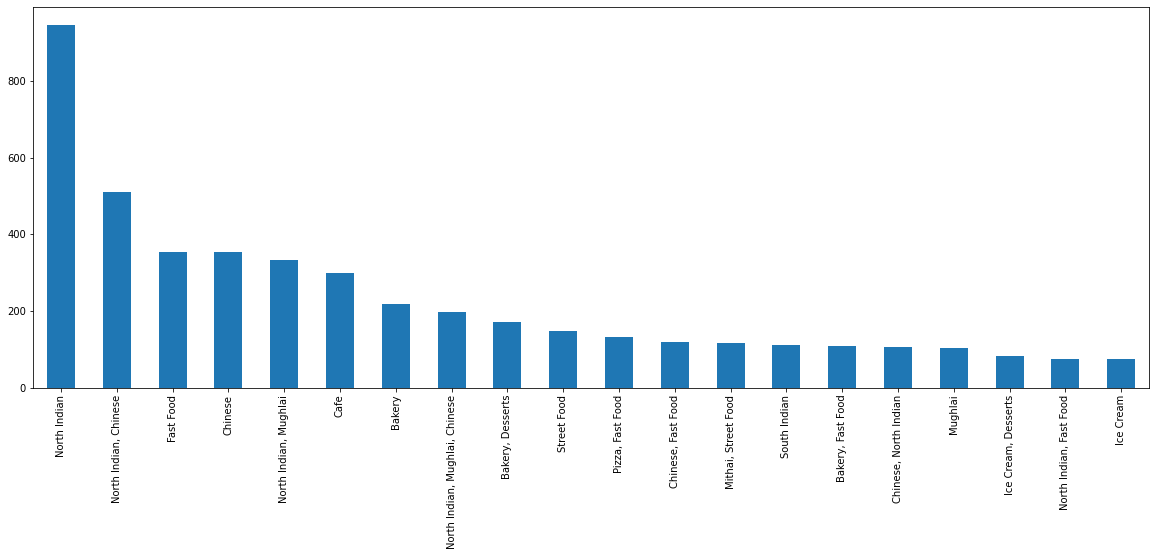

In [31]:
# Plotting the most common cuisines
df['Cuisines'].value_counts().head(20).plot(kind='bar', figsize = (20,7))

<a name="2.2.2"></a>
#### 2.2.2 What are the top 15 restaurants with Maximum Outlets?
Back to [Table of Contents](#0)

Let us plot a Pie Chart with the distribution of restaurants.

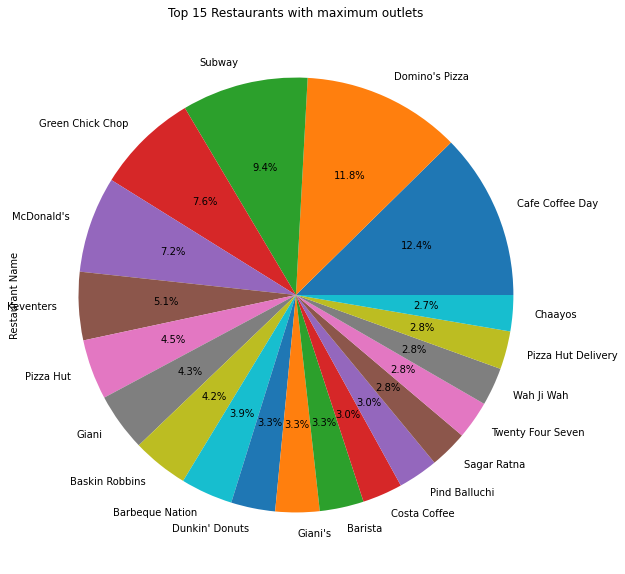

In [33]:
# Plotting pie chart with title and float with 1 decimal points
df['Restaurant Name'].value_counts().head(20).plot(kind='pie',figsize=(10,10), title="Top 15 Restaurants with maximum outlets", autopct='%1.1f%%')


<a name="2.3"></a>
### 2.3 How does Aggregate Rating get affected by other metrics?
Back to [Table of Contents](#0)

In [139]:
fig = px.bar(df, x='Aggregate rating', y='Votes', color='Rating text',\
             hover_data=['Restaurant Name'])
fig.show()

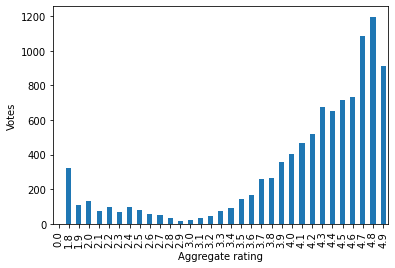

In [35]:
# Let us group by Aggregate Rating, Votes and plot a Bar Chart
df.groupby('Aggregate rating')['Votes'].mean().plot(kind='bar')

# Plotting the Votes on the y label
plt.ylabel('Votes') 
plt.show();

In [36]:
# Let us view the head of the data
df.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines

In [37]:
fig = px.box(df, x="Country", y="Aggregate rating", points="all", width=1400, height=600)
fig.show()

In [38]:
fig = px.box(df, x="Country", y="Votes", points="all", width=1400, height=600)
fig.show()

In [39]:
fig = px.box(df, x="Has Online delivery", y="Aggregate rating", points="all")
fig.show()

In [40]:

fig = px.box(df, x="Has Table booking", y="Aggregate rating", points="all")
fig.show()

In [41]:
fig = px.box(df, x="Country", y="Aggregate rating", color="Has Table booking")
fig.update_traces()
fig.show()

In [42]:
#Country vs Average Rating 

fig = px.box(df, x="Country", y="Aggregate rating",
                 width=1000, height=400)

fig.show()

In [43]:
df.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines

[Grouping and Sorting](https://www.kaggle.com/residentmario/grouping-and-sorting)

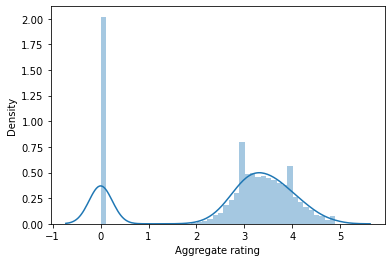

In [46]:
# Plotting the distribution of the Aggregate rating.
sns.distplot(df['Aggregate rating'])

We shall now proceed to clean the data a little post understanding the distribution of the columns. 

- We notice a bias towards the restaurants that have Aggregate Rating = 0 & Votes = 0
- This would indiacate that these are new restaurants 

In [64]:
df.shape

(9551, 22)

In [73]:
dfNewRestaurantsRemoved = df[(df['Votes']!=0) & (df['Aggregate rating']!=0)]
df[(df['Votes']!=0) & (df['Aggregate rating']!=0)].shape

(7403, 22)

In [118]:
tempDf = dfNewRestaurantsRemoved.groupby(['Country'], as_index=False).mean().round()
tempDf = tempDf.sort_values(by = 'Votes', ascending=False)
tempDf

Country  Restaurant ID  Country Code  Longitude  Latitude  \
4        Indonesia     11597985.0          94.0      102.0      -6.0   
12             UAE      6905759.0         214.0       55.0      25.0   
11          Turkey      5965865.0         208.0       31.0      40.0   
14   United States     17390069.0         216.0      -93.0      36.0   
6      Phillipines      8472714.0         162.0      121.0      15.0   
9     South Africa      7744283.0         189.0       25.0     -29.0   
5      New Zealand      8469621.0         148.0      175.0     -38.0   
13  United Kingdom      6852376.0         215.0       -2.0      53.0   
3            India      6380545.0           1.0       75.0      27.0   
7            Qatar     11008426.0         166.0       52.0      25.0   
10       Sri Lanka      5800682.0         191.0       76.0       7.0   
0        Australia     16729138.0          14.0      145.0     -34.0   
2           Canada     16656334.0          37.0      -94.0      47.0   
8        Singapore     18484347.0         184.0      104.0       1.0   
1           Brazil      6875588.0          30.0      -46.0     -21.0   

    Average Cost for two  Price range  Aggregate rating  Votes  
4               281190.0          3.0               4.0  772.0  
12                 166.0          3.0               4.0  494.0  
11                  85.0          3.0               4.0  431.0  
14                  26.0          2.0               4.0  431.0  
6                 1607.0          3.0               4.0  407.0  
9                  420.0          4.0               4.0  315.0  
5                   70.0          3.0               4.0  243.0  
13                  48.0          3.0               4.0  208.0  
3                  716.0          2.0               3.0  182.0  
7                  224.0          4.0               4.0  164.0  
10                2375.0          3.0               4.0  146.0  
0                   24.0          2.0               4.0  111.0  
2                   36.0          2.0               4.0  103.0  
8                  156.0          4.0               4.0   32.0  
1                  142.0          4.0               4.0   21.0

In [120]:
fig = px.bar(tempDf, x='Country', y='Votes', hover_data=['Average Cost for two'])
# Customize aspect
fig.update_traces(marker_color='rgb(0,255,0)', marker_line_color='rgb(255,255,255)',\
                  marker_line_width=1.5, opacity=0.3)
fig.show()

In [140]:
dfCurrencyModified = zomatoCountryDf.copy(deep=True)

dfCurrencyModified['Average Cost for two'] = np.where(dfCurrencyModified['Currency'] == 'Indonesian Rupiah(IDR)',
                                           dfCurrencyModified['Average Cost for two'] * 0.0051,
                                           dfCurrencyModified['Average Cost for two'])

dfNewRestaurantsRemoved = dfCurrencyModified[(dfCurrencyModified['Votes']!=0) & (dfCurrencyModified['Aggregate rating']!=0)]

In [141]:
tempDf = dfNewRestaurantsRemoved.groupby(['Country', 'City'], as_index=False).mean().round()
tempDf = tempDf.sort_values(by = ['Aggregate rating', 'Votes'], ascending=False)
tempDf.head()

Country         City  Restaurant ID  Country Code  Longitude  \
82      Phillipines   Pasig City      6311448.0         162.0      121.0   
79      Phillipines  Makati City      6310962.0         162.0      121.0   
104  United Kingdom       London      6109236.0         215.0       -0.0   
87      Phillipines  Taguig City      9297426.0         162.0      121.0   
91     South Africa   Inner City     12420454.0         189.0       28.0   

     Latitude  Average Cost for two  Price range  Aggregate rating  Votes  
82       15.0                 933.0          3.0               5.0  697.0  
79       15.0                1150.0          3.0               5.0  452.0  
104      52.0                  64.0          3.0               5.0  436.0  
87       15.0                1725.0          4.0               5.0  416.0  
91      -26.0                1120.0          4.0               5.0  318.0

In [146]:
fig = px.scatter_3d(tempDf, x='Country', y='City', z='Votes',
              color='Average Cost for two')
fig.show()

In [147]:
fig = px.scatter_3d(tempDf, x='Average Cost for two', y='Price range', z='Aggregate rating',
              color='Country')
fig.show()